# Things to do 

for today clustering steps:

1- load the pandas data frame songs of the audio features (minimum 500 songs as diverse as possible))

2- standardise the data using standardscaler (using fit and then transform)

3- save the scaler for future use for the new user input song. save it using pickle

4- choosing the number of clusters k.

5- fitting k means cluster.

6- build the elbow graph to find the best k.

7- use the model with the best k to assign every observation in your data frame to its cluster number ( adding cluster columns to the pandas data frame) using model.predict

8-save the model with the best k as your final model using pickle.

for the user input tasks and the full scenario:

1- get the song name from the user as an input

2- play the input song in music embed player.

3- get the audio features for that song from spotify API. using sp.audio_features(trackid) . pay attention to keep only the audio features columns.

4- load the standardscaler using pickle and use it to scale the new song. (scaler.transform)

5- using mode.predict(new scaled audio record for the new song) to predict the cluster (label)
for the new song.

6- return random song from the same cluster that the new song belongs to from your data frame and suggest it to the user.

7- play it using embedded music player. (edited) (edited) 





In [73]:
import spotipy
import pandas as pd
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import pprint
from IPython.display import IFrame
import pprint
from random import randint
from bs4 import BeautifulSoup
import requests
import pickle
import numpy as np
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from time import sleep
from __future__ import print_function  
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from random import randint
from time import sleep

In [2]:
song_recommender_df = pd.read_csv('Song_recommender.csv')
song_recommender_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.623,0.734,-5.950,0.1070,0.016200,0.000002,0.1450,0.372,107.853,76FZM38RC8XaAjJ77CVTNe,244453
1,0.722,0.851,-3.873,0.0639,0.031900,0.000000,0.1080,0.452,126.885,5yDL13y5giogKs2fSNf7sj,197936
2,0.688,0.734,-4.569,0.0274,0.004620,0.000000,0.0756,0.460,140.004,2hns6Dv29Yrg68AVTJiAyA,208493
3,0.688,0.702,-4.792,0.0499,0.021500,0.000000,0.1280,0.740,94.006,3jomjC6H7YQBRr2CHPtc4y,192191
4,0.706,0.841,-3.956,0.0418,0.000079,0.000000,0.0688,0.861,132.032,0iGckQFyv6svOfAbAY9aWJ,220227
...,...,...,...,...,...,...,...,...,...,...,...
16910,0.391,0.590,-13.622,0.0449,0.676000,0.553000,0.0661,0.479,113.675,7xBXbeQkcVeOELZgGa705e,1001120
16911,0.403,0.764,-8.554,0.0451,0.022100,0.170000,0.2450,0.196,138.725,5NERbS7923kF471NLKDZkB,666572
16912,0.406,0.306,-10.482,0.0372,0.313000,0.007900,0.0727,0.073,135.272,5pSSEkT0963muzzIjsVkrs,652560
16913,0.362,0.507,-11.229,0.0394,0.017400,0.216000,0.1130,0.456,146.641,7gC6Rbllqf1yXNC02e5jz2,634440


In [3]:
song_recommender_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,16915.000000,16915.000000,16915.000000,16915.000000,16915.000000,16915.000000,16915.000000,16915.000000,16915.000000,1.691500e+04
mean,0.575113,0.621438,-8.154229,0.073617,0.282311,0.111195,0.182353,0.472804,120.548579,2.562062e+05
std,0.167036,0.245596,4.817042,0.076866,0.319681,0.266549,0.148971,0.250894,29.013887,2.879161e+05
min,0.000000,0.000000,-53.436000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.704000e+04
25%,0.468000,0.457000,-9.803000,0.034700,0.019100,0.000000,0.094700,0.270000,98.911500,1.868400e+05
50%,0.586000,0.670000,-6.819000,0.045500,0.129000,0.000027,0.122000,0.463000,119.987000,2.181510e+05
75%,0.695000,0.820000,-5.023000,0.074700,0.501000,0.009110,0.222000,0.671000,138.746000,2.563535e+05
max,0.980000,1.000000,1.342000,0.957000,0.996000,0.999000,0.988000,1.000000,240.052000,6.000661e+06


In [4]:
song_recommender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16915 entries, 0 to 16914
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      16915 non-null  float64
 1   energy            16915 non-null  float64
 2   loudness          16915 non-null  float64
 3   speechiness       16915 non-null  float64
 4   acousticness      16915 non-null  float64
 5   instrumentalness  16915 non-null  float64
 6   liveness          16915 non-null  float64
 7   valence           16915 non-null  float64
 8   tempo             16915 non-null  float64
 9   id                16915 non-null  object 
 10  duration_ms       16915 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


# Standarize Data with Standart Scaler

In [60]:
X = song_recommender_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
X 

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.623,0.734,-5.950,0.1070,0.016200,0.000002,0.1450,0.372,107.853
1,0.722,0.851,-3.873,0.0639,0.031900,0.000000,0.1080,0.452,126.885
2,0.688,0.734,-4.569,0.0274,0.004620,0.000000,0.0756,0.460,140.004
3,0.688,0.702,-4.792,0.0499,0.021500,0.000000,0.1280,0.740,94.006
4,0.706,0.841,-3.956,0.0418,0.000079,0.000000,0.0688,0.861,132.032
...,...,...,...,...,...,...,...,...,...
16910,0.391,0.590,-13.622,0.0449,0.676000,0.553000,0.0661,0.479,113.675
16911,0.403,0.764,-8.554,0.0451,0.022100,0.170000,0.2450,0.196,138.725
16912,0.406,0.306,-10.482,0.0372,0.313000,0.007900,0.0727,0.073,135.272
16913,0.362,0.507,-11.229,0.0394,0.017400,0.216000,0.1130,0.456,146.641


In [61]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.623,0.734,-5.950,0.1070,0.016200,0.000002,0.1450,0.372,107.853
1,0.722,0.851,-3.873,0.0639,0.031900,0.000000,0.1080,0.452,126.885
2,0.688,0.734,-4.569,0.0274,0.004620,0.000000,0.0756,0.460,140.004
3,0.688,0.702,-4.792,0.0499,0.021500,0.000000,0.1280,0.740,94.006
4,0.706,0.841,-3.956,0.0418,0.000079,0.000000,0.0688,0.861,132.032


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.286693,0.458334,0.457603,0.434318,-0.832452,-0.417169,-0.250748,-0.401791,-0.437582
1,0.879396,0.934739,0.888793,-0.126417,-0.783339,-0.417176,-0.499125,-0.082922,0.218399
2,0.675841,0.458334,0.744302,-0.601284,-0.868677,-0.417176,-0.716623,-0.051035,0.670575
3,0.675841,0.328035,0.698007,-0.308558,-0.815873,-0.417176,-0.364867,1.065006,-0.914850
4,0.783606,0.894021,0.871562,-0.413939,-0.882880,-0.417176,-0.762271,1.547295,0.395802


In [62]:
import pickle
pickle.dump(X_scaled, open('x_scaler.pkl','wb'))

X_scaled = pickle.load(open('x_scaler.pkl','rb'))
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.623,0.734,-5.950,0.1070,0.016200,0.000002,0.1450,0.372,107.853
1,0.722,0.851,-3.873,0.0639,0.031900,0.000000,0.1080,0.452,126.885
2,0.688,0.734,-4.569,0.0274,0.004620,0.000000,0.0756,0.460,140.004
3,0.688,0.702,-4.792,0.0499,0.021500,0.000000,0.1280,0.740,94.006
4,0.706,0.841,-3.956,0.0418,0.000079,0.000000,0.0688,0.861,132.032
...,...,...,...,...,...,...,...,...,...
16910,0.391,0.590,-13.622,0.0449,0.676000,0.553000,0.0661,0.479,113.675
16911,0.403,0.764,-8.554,0.0451,0.022100,0.170000,0.2450,0.196,138.725
16912,0.406,0.306,-10.482,0.0372,0.313000,0.007900,0.0727,0.073,135.272
16913,0.362,0.507,-11.229,0.0394,0.017400,0.216000,0.1130,0.456,146.641


In [63]:
X_scaled_df.describe() 


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.691500e+04,1.691500e+04,1.691500e+04,1.691500e+04,1.691500e+04,1.691500e+04,1.691500e+04,1.691500e+04,1.691500e+04
mean,-3.574111e-16,2.036503e-16,-1.093568e-16,2.939843e-16,-2.994747e-16,2.319756e-15,-7.057120e-17,1.238606e-16,-3.426201e-16
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-3.443142e+00,-2.530397e+00,-9.400605e+00,-9.577602e-01,-8.831290e-01,-4.171763e-01,-1.224118e+00,-1.884531e+00,-4.154981e+00
25%,-6.412755e-01,-6.695659e-01,-3.422888e-01,-5.063107e-01,-8.233802e-01,-4.171763e-01,-5.884067e-01,-8.083485e-01,-7.457711e-01
50%,6.517816e-02,1.977362e-01,2.771967e-01,-3.658019e-01,-4.795902e-01,-4.170757e-01,-4.051445e-01,-3.907760e-02,-1.935608e-02
75%,7.177497e-01,8.085122e-01,6.500507e-01,1.409226e-02,6.841032e-01,-3.829978e-01,2.661455e-01,7.899812e-01,6.272155e-01
max,2.424015e+00,1.541444e+00,1.971440e+00,1.149288e+01,2.232566e+00,3.330831e+00,5.408227e+00,2.101329e+00,4.118957e+00


# Clustering the Songs with K-Means

We will pick manually the number of clusters we want - let's set it to 8. Later we will discuss how many clusters should we have.

When randomness is involved (remember, **K-means picks randomly the initial centroids**), we better use a random seed so that we can reproduce our results. We can set this directly to the argument **random_state**.

In [64]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_scaled_df) 

KMeans(n_clusters=10, random_state=1234)

In [65]:
kmeans.labels_ 

array([9, 8, 8, ..., 1, 3, 0], dtype=int32)

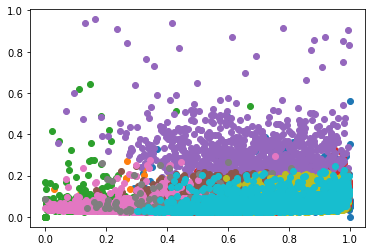

In [66]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show() 


In [67]:
model = kmeans.fit(X_scaled_df) 
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [68]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     860
1    1238
2    1152
3    2069
4     926
5    2130
6    1615
7     744
8    3032
9    3149
dtype: int64

In [56]:
#X_df = pd.DataFrame(X)
song_recommender_df["cluster"] = clusters
song_recommender_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.623,0.734,-5.950,0.1070,0.016200,0.000002,0.1450,0.372,107.853,76FZM38RC8XaAjJ77CVTNe,244453,9
1,0.722,0.851,-3.873,0.0639,0.031900,0.000000,0.1080,0.452,126.885,5yDL13y5giogKs2fSNf7sj,197936,8
2,0.688,0.734,-4.569,0.0274,0.004620,0.000000,0.0756,0.460,140.004,2hns6Dv29Yrg68AVTJiAyA,208493,8
3,0.688,0.702,-4.792,0.0499,0.021500,0.000000,0.1280,0.740,94.006,3jomjC6H7YQBRr2CHPtc4y,192191,8
4,0.706,0.841,-3.956,0.0418,0.000079,0.000000,0.0688,0.861,132.032,0iGckQFyv6svOfAbAY9aWJ,220227,8
...,...,...,...,...,...,...,...,...,...,...,...,...
16910,0.391,0.590,-13.622,0.0449,0.676000,0.553000,0.0661,0.479,113.675,7xBXbeQkcVeOELZgGa705e,1001120,7
16911,0.403,0.764,-8.554,0.0451,0.022100,0.170000,0.2450,0.196,138.725,5NERbS7923kF471NLKDZkB,666572,9
16912,0.406,0.306,-10.482,0.0372,0.313000,0.007900,0.0727,0.073,135.272,5pSSEkT0963muzzIjsVkrs,652560,1
16913,0.362,0.507,-11.229,0.0394,0.017400,0.216000,0.1130,0.456,146.641,7gC6Rbllqf1yXNC02e5jz2,634440,3


In [57]:
song_recommender_df[song_recommender_df.cluster == 0].mean()

/var/folders/c3/pkgzz_891b148813l5gzlgl40000gn/T/ipykernel_69611/768096382.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  song_recommender_df[song_recommender_df.cluster == 0].mean()


danceability             0.534087
energy                   0.759428
loudness                -7.142391
speechiness              0.080971
acousticness             0.165009
instrumentalness         0.086757
liveness                 0.642908
valence                  0.496652
tempo                  121.444676
duration_ms         369804.401163
cluster                  0.000000
dtype: float64

In [58]:
song_recommender_df[song_recommender_df['cluster'] == 2].sample() 

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
4228,0.185,0.0534,-23.294,0.0408,0.909,0.858,0.0969,0.0357,85.934,0yMaGil4yVbV6YhXXAXw83,194947,2


# Kmeans Parameters

In [17]:
kmeans.inertia_

62158.6071175672

In [18]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)


102899.85289473385


# Chosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

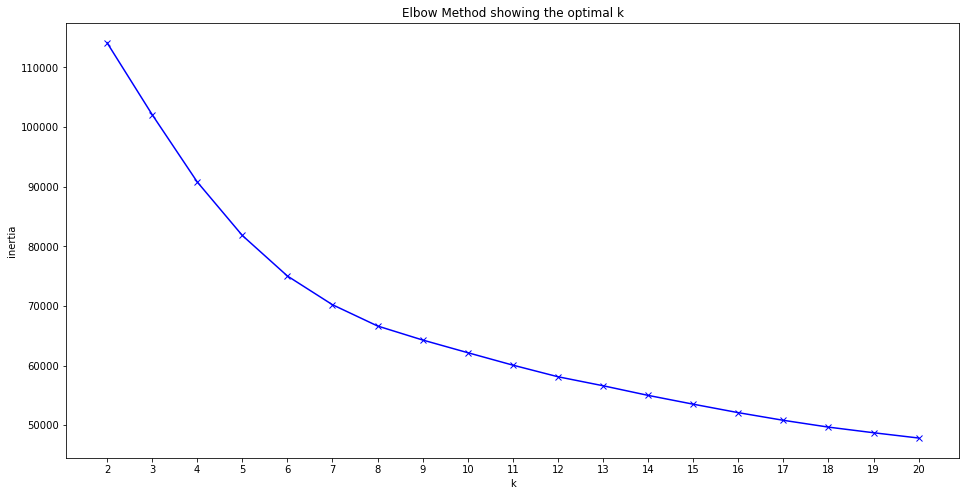

In [19]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')

plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# Silouhette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

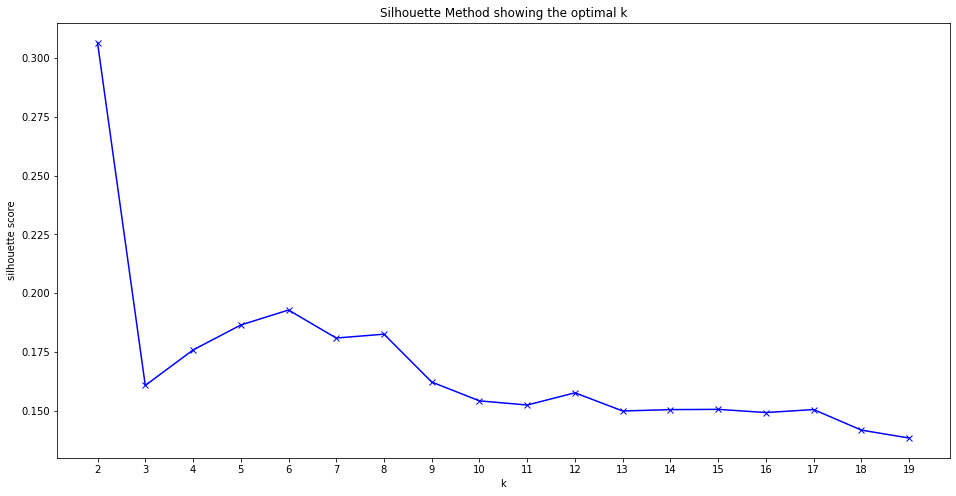

In [20]:
#X_scaled = pickle.load(open('x_scaler.pkl','rb'))
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    #filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename,'rb'):
        #pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

# Recommend a Song

We'll recommend a user similar song based on the cluster. So first we need to get the input and then scale the audio futures of the song.

## Get User Input

In [59]:
song_name = input("Please enter your favorite song: ")
def song_input(song_name):
    print("Your choice: " + song_name)


Please enter your favorite song: la macarena


In [30]:
song_input(song_name)

Your choice: la macarena


## Get the Song's Audio Futures

In [31]:
import spotipy

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))
results = sp.search(q=song_name, limit=1, market='GB')
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=la+macarena&type=track&market=GB&offset=0&limit=1',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2WSFLb1izcqFnU9KakhCnU'},
       'href': 'https://api.spotify.com/v1/artists/2WSFLb1izcqFnU9KakhCnU',
       'id': '2WSFLb1izcqFnU9KakhCnU',
       'name': 'Janie',
       'type': 'artist',
       'uri': 'spotify:artist:2WSFLb1izcqFnU9KakhCnU'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/1UK0794RKtEfbCRhUV2yRj'},
     'href': 'https://api.spotify.com/v1/albums/1UK0794RKtEfbCRhUV2yRj',
     'id': '1UK0794RKtEfbCRhUV2yRj',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b2730215601d41bd282093671126',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e020215601d41bd282093671126',
       'width': 300},
      {'height': 64,
       'url': 'https://i.scdn

In [32]:
results["tracks"]["items"][0]["external_urls"]["spotify"]

'https://open.spotify.com/track/6N8ja8D3Ay52DnGDLKdrHX'

In [33]:
track_id=track_id=results["tracks"]["items"][0]["id"]
track_id

'6N8ja8D3Ay52DnGDLKdrHX'

In [35]:
from IPython.display import IFrame


#track_id = "1rfORa9iYmocEsnnZGMVC4"
#track_id= 'spotify:track:3hgl7EQwTutSm6PESsB7gZ'
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )


In [36]:
#Audio futures of the song
song_futures = sp.audio_features(results["tracks"]["items"][0]["id"] )
song_futures 

[{'danceability': 0.68,
  'energy': 0.776,
  'key': 6,
  'loudness': -6.495,
  'mode': 0,
  'speechiness': 0.0312,
  'acousticness': 0.141,
  'instrumentalness': 0,
  'liveness': 0.131,
  'valence': 0.566,
  'tempo': 127.986,
  'type': 'audio_features',
  'id': '6N8ja8D3Ay52DnGDLKdrHX',
  'uri': 'spotify:track:6N8ja8D3Ay52DnGDLKdrHX',
  'track_href': 'https://api.spotify.com/v1/tracks/6N8ja8D3Ay52DnGDLKdrHX',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6N8ja8D3Ay52DnGDLKdrHX',
  'duration_ms': 187233,
  'time_signature': 4}]

In [37]:
df = pd.DataFrame(song_futures)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.68,0.776,6,-6.495,0,0.0312,0.141,0,0.131,0.566,127.986,audio_features,6N8ja8D3Ay52DnGDLKdrHX,spotify:track:6N8ja8D3Ay52DnGDLKdrHX,https://api.spotify.com/v1/tracks/6N8ja8D3Ay52...,https://api.spotify.com/v1/audio-analysis/6N8j...,187233,4


In [39]:
song_choice_df= df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
song_choice_df


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.68,0.776,-6.495,0.0312,0.141,0,0.131,0.566,127.986


## Scale the Audio Future of the Song

In [41]:
song_choice_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.00,1.000,1.000,1.0000,1.000,1.0,1.000,1.000,1.000
mean,0.68,0.776,-6.495,0.0312,0.141,0.0,0.131,0.566,127.986
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.68,0.776,-6.495,0.0312,0.141,0.0,0.131,0.566,127.986
25%,0.68,0.776,-6.495,0.0312,0.141,0.0,0.131,0.566,127.986
50%,0.68,0.776,-6.495,0.0312,0.141,0.0,0.131,0.566,127.986
75%,0.68,0.776,-6.495,0.0312,0.141,0.0,0.131,0.566,127.986
max,0.68,0.776,-6.495,0.0312,0.141,0.0,0.131,0.566,127.986


In [42]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [43]:
scaler2 = load("/Users/esrabecker/Desktop/GitHub/Song-Recommender/x_scaler.pkl")
scaler2

array([[ 0.28669329,  0.45833395,  0.45760323, ..., -0.25074779,
        -0.40179084, -0.43758197],
       [ 0.87939592,  0.93473931,  0.88879343, ..., -0.49912509,
        -0.08292205,  0.21839917],
       [ 0.67584148,  0.45833395,  0.74430215, ..., -0.71662305,
        -0.05103518,  0.67057532],
       ...,
       [-1.012463  , -1.28441384, -0.48325088, ..., -0.73609046,
        -1.59356291,  0.50747618],
       [-1.27588639, -0.46597387, -0.63832988, ..., -0.46556059,
        -0.06697862,  0.89933461],
       [-1.46148015,  0.45426211, -0.10728292, ...,  5.13299804,
        -0.36990396,  0.27447742]])

In [44]:
X_scaled = scaler.transform(song_choice_df)
X_scaled

array([[ 0.62794632,  0.62935126,  0.34445992, -0.55184591, -0.44205167,
        -0.41717629, -0.34472839,  0.37146596,  0.25634763]])

## Using mode.predict (new scaled audio record for the new song) to predict the cluster (label) for the new song

In [45]:
with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)
with open("kmeans2.pickle", "wb") as f:
    pickle.dump(kmeans2,f)

In [46]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


In [47]:
scaler = load("scaler.pickle")


In [48]:
scaler

StandardScaler()

In [49]:
kmeans2 = load("kmeans2.pickle")


In [50]:
X_scaled = scaler.transform(song_choice_df)
X_scaled

array([[ 0.62794632,  0.62935126,  0.34445992, -0.55184591, -0.44205167,
        -0.41717629, -0.34472839,  0.37146596,  0.25634763]])

In [51]:
prediction = kmeans2.predict(X_scaled)
prediction[0]

/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


2

In [69]:
prediction_df=song_recommender_df.loc[song_recommender_df['cluster']==prediction[0]]
prediction_df.reset_index(drop=True)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.213,0.06560,-24.810,0.0467,0.992,0.969,0.0699,0.0384,65.023,3U8Fx7zNTQrctytkj6Gqgd,150147,2
1,0.330,0.00357,-33.142,0.0339,0.995,0.953,0.0989,0.1210,100.741,6MzbO6YS0M6tjwT93hjAl0,216213,2
2,0.368,0.00363,-36.759,0.0350,0.993,0.922,0.1370,0.0850,69.363,1L4NadMj3Jj7YgGaikyhfr,254000,2
3,0.320,0.00501,-33.366,0.0455,0.993,0.919,0.0618,0.0383,68.947,3hCPh4oVVjaM8tv9sFH8cx,294960,2
4,0.303,0.00958,-28.556,0.0540,0.991,0.953,0.1090,0.2120,72.204,7elLKWtTEMCbOmYZ37ci9r,264845,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0.239,0.19500,-16.435,0.0510,0.952,0.847,0.6770,0.1090,78.672,5OkPvlfgHynyLWcxaPzNy8,646587,2
1148,0.320,0.11400,-22.513,0.0420,0.989,0.901,0.1220,0.1360,111.041,1iu0K51Q0OkaKeaFXl0Az0,675240,2
1149,0.246,0.66200,-26.692,0.2480,0.800,0.912,0.1320,0.0321,83.405,3YsmUKcX35hIqdrn7Nnk82,676049,2
1150,0.374,0.37800,-15.701,0.0584,0.542,0.805,0.0929,0.0908,100.191,2hiKdYK7TQ31kOdfE67C7D,680176,2


In [71]:
prediction_list = (prediction_df['id']).to_list()
prediction_list

['3U8Fx7zNTQrctytkj6Gqgd',
 '6MzbO6YS0M6tjwT93hjAl0',
 '1L4NadMj3Jj7YgGaikyhfr',
 '3hCPh4oVVjaM8tv9sFH8cx',
 '7elLKWtTEMCbOmYZ37ci9r',
 '1eqyKmkcp7b2s1PU9fEZRS',
 '4tKmydUDl8OIeb7fioEsnl',
 '1BncfTJAWxrsxyT9culBrj',
 '6YDgMoJ8ssOuKjQ6jiz4Kk',
 '2d6ml9Qkx8r4EjuUyrdpRV',
 '0vzSIBAqnN1HzvWrPbh6VF',
 '2ZrF3UfwS50CKE8jQQVjWj',
 '0aDl3mGEr6eZcSwoJo91Np',
 '2gMCNoPiMjuVMmzQRlOXMV',
 '2vz6Zep5xyCIAZgIroYL1X',
 '1D5LT3ZUtwpXFpiv18M0R2',
 '3weNRklVDqb4Rr5MhKBR3D',
 '0H2VhGUC3P3hvwz8rdGIpC',
 '64LTn5fTsPR0QLy7bVYl9w',
 '24cgBBhZD1cWekUqaYuqTB',
 '4zdyJk5NEGXiWIZ87zfRVQ',
 '0kckvKwPBjQuVLgwGnICAv',
 '7i9cdG6l1lg0xAraTublsw',
 '1mlLOJXeUrwviYpUHYeZE8',
 '0OrZXWjGgGUuoIoqnLvtJN',
 '5zIJsFst05gsrUdr9ghEpG',
 '16i2ij3Q3tqSpZjHXbTDXW',
 '503fwzlbWHx5g0CqlU9Giu',
 '0DqFXzLtKkj9JO421NJpl1',
 '1TQ2UYCN7nhfj3cfcFC76V',
 '7lY6qt63y0Ag5lpHMVglLo',
 '7F0TGSmNn87tqm4tB81m4U',
 '5xVcnhVL0AwcOgbpuxTu6W',
 '1hX3yoGAJypm6dMMWLoyKo',
 '4nd6FMCfNFWkbi2dnsf5I3',
 '3NrOSg735np3PW8OEvt5F8',
 '0H3JiNc4CGnFVwMqWvACmO',
 

In [76]:
import random
recomendation=random.choice(prediction_list)
recomendation

'7ggNJdMwGNc6ow4TSZZyib'

In [77]:
IFrame(src="https://open.spotify.com/embed/track/"+recomendation,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",)

In [114]:
hot_songs_df = pd.read_csv('hot_songs') 

In [115]:
import difflib 
import random

In [116]:
difflib.get_close_matches('static', hot_songs['song'])

['static', 'sticky', 'stay']

In [143]:
#Test the song if it's in the hot list recommend another one

costumer = input("select your song or your artist: ")


if costumer in list(hot_songs['song']):
    computer = random.choice(hot_songs['song'])
    print('Recommendation:',computer)
elif difflib.get_close_matches(costumer, hot_songs['song']):
    computer = random.choice(song_recp['song'])
    print('do you mean:',difflib.get_close_matches(costumer, df['song'],'?')[0])
    customer2=input()
    if customer2 == 'yes':
        print('Recommendation:',computer)
    elif customer2 == 'no':
        print('Unfortunately, the song is not in the hot list!')
else:
    print("Not Found in Hot songs, searching in our recomendations")
    choice2 = song_recommender_df.loc[(song_recommender_df['track_name'].str.lower() == song.lower())]
    if len(choice2) > 0:
        suggest = song_recommender_df.loc[song_recommender_df["cluster"]==choice2["cluster"].values[0]].sample()
        print("Maybe you can like this music: ", suggest['track_name'].values[0])
        sleep(randint(1,3))
    else: 
        cluster_features = features(song, artist)
        if cluster_features >=0:
            suggest = song_recommender_df.loc[song_recommender_df["cluster"]==cluster_features].sample()
            print("Maybe you can like this song: ", suggest['track_name'].values[0])
            sleep(randint(1,3))
        else:
            print("I can't find this song. Try another music")
    

select your song or your artist: la macarena


KeyError: 'song'